# Productivity Quotient Factor EDA

In [1]:
# import necessary libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a folder called Data if not already created
if not os.path.exists('Data'):
    os.makedirs('Data')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read WPA_DataCase_2024_DataDictionary.xlsx
data_dictionary = pd.read_excel('WPA_DataCase_2024_DataDictionary.xlsx')

# Read WPA_DataCase_2024.csv
data = pd.read_csv('WPA_DataCase_2024.csv')


In [2]:
# Check nulls
data.isnull().sum()/len(data)*100

DEMO_Org                              0.000000
DEMO_meeting_remote                  66.040462
DEMO_Dept                             0.000000
OBSV_PreC_Location_A_primryoffice    74.855491
OBSV_PreC_Location_B_officeother     90.606936
                                       ...    
PREF_space_C_videoconf                9.682081
PREF_space_D_impromptu                9.682081
PREF_space_E_recharge                48.771676
PREF_space_F_accessible               9.682081
PREF_space_G_firstarrive             48.771676
Length: 185, dtype: float64

## Converting into numerics

### Logical Variables

In [3]:
# find Variable name where class is logical
logical_variables = data_dictionary[data_dictionary['class'] == 'logical']['Variable name']

# convert logical variables to numeric
data[logical_variables] = data[logical_variables].replace({'Yes': 1, 'No': 0})

### Factor Variables - Importance

In [4]:
# find Variable name where class column contains 'factor' and responses column contain lower case of important
important_variables = data_dictionary[(data_dictionary['class'].str.contains('factor', case=False)) & \
                                      (data_dictionary['responses'].str.contains('important', case=False))]['Variable name']

# convert important variables to numeric
data[important_variables] = data[important_variables].replace({'Very important': 5, 'Important': 4, 'Neutral': 2.5, 'Unimportant': 1, 'Very unimportant': 0})

### Factor Variables - Agreement

In [5]:
# find Variable name where class column contains 'factor' and responses column contain lower case of agree
agree_variables = data_dictionary[(data_dictionary['class'].str.contains('factor', case=False)) & \
                                      (data_dictionary['responses'].str.contains('agree', case=False))]['Variable name']

# convert agree variables to numeric
data[agree_variables] = data[agree_variables].replace({'Strongly agree': 5, 'Agree': 4, 'Neutral': 2.5, 'Disagree': 1, 'Strongly disagree': 0})

### Factor Variables - Satisfaction

In [6]:
# find Variable name where class column contains 'factor' and responses column contain lower case of satis
satis_variables = data_dictionary[(data_dictionary['class'].str.contains('factor', case=False)) & \
                                      (data_dictionary['responses'].str.contains('satis', case=False))]['Variable name']

# convert satis variables to numeric
data[satis_variables] = data[satis_variables].replace({'Very satisfied': 5, 'Satisfied': 4, 'Neutral': 2.5, 'Unsatisfied': 1, 'Very unsatisfied': 0,
                                                               'Dissatisfied': 1, 'Very dissatisfied': 0})

In [7]:
data.describe(include='all')

DEMO_Org  DEMO_meeting_remote DEMO_Dept  \
count      1384           470.000000      1384   
unique        5                  NaN        16   
top       Org 5                  NaN   Finance   
freq        541                  NaN       227   
mean        NaN             0.382979       NaN   
std         NaN             0.486631       NaN   
min         NaN             0.000000       NaN   
25%         NaN             0.000000       NaN   
50%         NaN             0.000000       NaN   
75%         NaN             1.000000       NaN   
max         NaN             1.000000       NaN   

        OBSV_PreC_Location_A_primryoffice  OBSV_PreC_Location_B_officeother  \
count                          348.000000                        130.000000   
unique                                NaN                               NaN   
top                                   NaN                               NaN   
freq                                  NaN                               NaN   
mean                             0.661310                          0.069346   
std                              0.314214                          0.156640   
min                              0.000000                          0.000000   
25%                              0.400000                          0.000000   
50%                              0.745000                          0.000000   
75%                              1.000000                          0.050000   
max                              1.000000                          0.900000   

        OBSV_PreC_Location_C_client  OBSV_PreC_Location_D_WFH  \
count                     98.000000                255.000000   
unique                          NaN                       NaN   
top                             NaN                       NaN   
freq                            NaN                       NaN   
mean                       0.188837                  0.345922   
std                        0.251655                  0.273602   
min                        0.000000                  0.000000   
25%                        0.000250                  0.100000   
50%                        0.100000                  0.400000   
75%                        0.250000                  0.500000   
max                        1.000000                  1.000000   

        OBSV_PreC_Location_E_publicspace  OBSV_PreC_Location_F_transit  \
count                          67.000000                     88.000000   
unique                               NaN                           NaN   
top                                  NaN                           NaN   
freq                                 NaN                           NaN   
mean                            0.026716                      0.087091   
std                             0.045938                      0.124213   
min                             0.000000                      0.000000   
25%                             0.000000                      0.000000   
50%                             0.000000                      0.050000   
75%                             0.050000                      0.100000   
max                             0.200000                      0.800000   

        OBSV_PreC_Location_G_other  ...  DECSN_factors_C_WrkLifeSep  \
count                    80.000000  ...                  512.000000   
unique                         NaN  ...                         NaN   
top                            NaN  ...                         NaN   
freq                           NaN  ...                         NaN   
mean                      0.133487  ...                    3.957031   
std                       0.199152  ...                    1.098438   
min                       0.000000  ...                    0.000000   
25%                       0.000000  ...                    4.000000   
50%                       0.050000  ...                    4.000000   
75%                       0.200000  ...                    5.000000   
max   

## Feature Engineering - Creating combined data

In [8]:
# Perceived Productivity Quotient as the target variable
data['Perceived_Productivity_Quotient'] = data[['PostC_impact_shift_A_focus', 'PostC_impact_shift_E_innovate']].mean(axis=1)

In [9]:
# Perceived_Collaborative_Quotient measures the perceived collaborative effectiveness at home or at office
data['Perceived_Collaborative_Quotient'] = data[['PostC_impact_shift_I_managersconnect', 'PostC_impact_shift_F_colleagueaccess', 'PostC_impact_shift_J_client']].mean(axis=1)

In [10]:

# Define a custom function that returns NaN if all values are NaN, otherwise returns the sum
def custom_sum(row):
    if row.isnull().all():
        return np.nan  # Return NaN if all values are NaN
    else:
        return row.sum(skipna=True)  # Sum the row, skipping NaNs

# Distractions measures the perceived productivity loss due to distractions in minutes per week
# Apply this function across the specified columns
data['Distractions'] = data[['OBSV_PreC_5A_lost_layout', 'OBSV_PreC_5B_lost_looking', 'OBSV_PreC_5D_lost_roomtech', 
                   'OBSV_PreC_5F_lost_noise',  'OBSV_PreC_5E_lost_visitors']].apply(custom_sum, axis=1)

## Simple EDA

Distractions_bins
0 - 50       139
151 - 300     83
51 - 150     142
> 300         90
nan          924
Name: Perceived_Productivity_Quotient, dtype: int64


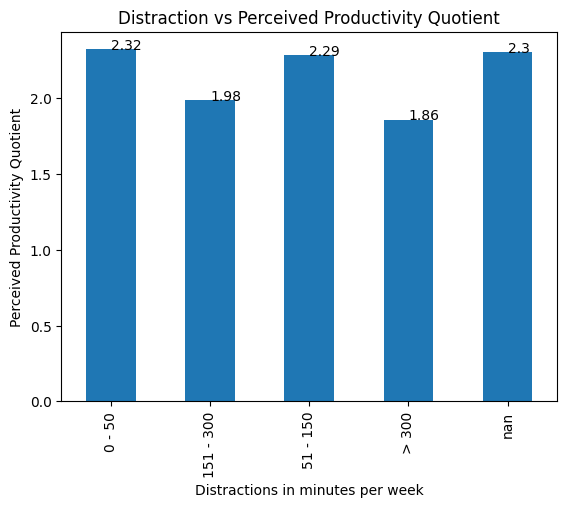

In [11]:
# plot a bar chart with Distraction  and Productivity location focus and innovate
data['Distractions_bins'] = pd.cut(data['Distractions'], bins=[-np.inf, 50, 150, 300, np.inf], labels=['0 - 50', '51 - 150', '151 - 300', '> 300'])
data['Distractions_bins'] = data['Distractions_bins'].astype(str)

print(data.groupby('Distractions_bins')['Perceived_Productivity_Quotient'].count())

# plot a bar chart with Distraction for Productivity (bin 0, 1-20, 21-60, >60) and Productivity location focus and innovate
data.groupby('Distractions_bins')['Perceived_Productivity_Quotient'].mean().plot(kind='bar')
plt.xlabel('Distractions in minutes per week')
plt.ylabel('Perceived Productivity Quotient')
# Label each bar in the bar chart
for index, value in enumerate(data.groupby('Distractions_bins')['Perceived_Productivity_Quotient'].mean()):
    plt.text(index, value, str(round(value, 2)))

plt.title('Distraction vs Perceived Productivity Quotient')
plt.show()

In [12]:
print(data.groupby('Perceived_Collaborative_Quotient')['Perceived_Productivity_Quotient'].count())

Perceived_Collaborative_Quotient
0.000000     89
0.666667      1
0.833333      2
1.000000     53
1.166667      9
1.250000      6
1.333333      2
1.500000      8
1.666667     10
1.750000      3
2.000000     49
2.166667      3
2.500000    528
2.666667      1
3.000000    154
3.250000     12
3.333333     26
3.500000     63
3.750000      8
3.833333     33
4.000000    169
4.166667     13
4.333333     15
4.500000      7
4.666667     19
5.000000     95
Name: Perceived_Productivity_Quotient, dtype: int64


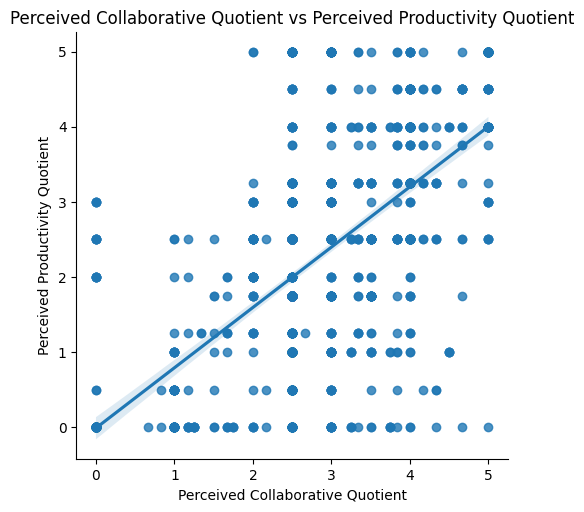

In [13]:
# plot a scatterplot chart with Collaborative and Perceived Productivity Quotient with best fit line
sns.lmplot(x='Perceived_Collaborative_Quotient', y='Perceived_Productivity_Quotient', data=data)
plt.xlabel('Perceived Collaborative Quotient')
plt.ylabel('Perceived Productivity Quotient')
plt.title('Perceived Collaborative Quotient vs Perceived Productivity Quotient')
plt.show()

# Export Data For further Tableau EDA

In [14]:
# export to data/ 
data.to_csv('Data/wharton_transformed_for_productivity.csv', index=False)

## Distraction Change Analysis (Proxy to Productivity Increase)

**Decreased Distraction due to solving office layout issues, visitor disruption and collaboration tool issues**
- SATSF_facilitate_Office_2B_inpersoncollab
- SATSF_facilitate_Office_2C_virtualcollab
- SATSF_facilitate_OfficeTech_4B_inpersoncollab
- SATSF_office_B_designexcellence
- OBSV_PreC_5A_lost_layout, OBSV_PreC_5B_lost_looking, OBSV_PreC_5D_lost_roomtech, OBSV_PreC_5E_lost_visitors

In [15]:
distraction_vars = ['OBSV_PreC_5A_lost_layout', 'OBSV_PreC_5B_lost_looking', 'OBSV_PreC_5D_lost_roomtech',  'OBSV_PreC_5E_lost_visitors']

data['Distractions_without_noise'] = data[['OBSV_PreC_5A_lost_layout', 'OBSV_PreC_5B_lost_looking', 
                                           'OBSV_PreC_5D_lost_roomtech', 'OBSV_PreC_5E_lost_visitors']].apply(custom_sum, axis=1)

# New column SATSF_facilitate_Office_2B_inpersoncollab, SATSF_facilitate_Office_2C_virtualcollab, SATSF_facilitate_OfficeTech_4B_inpersoncollab by mean
data['Satisfaction_Office_Collab_Design'] = data[['SATSF_facilitate_Office_2B_inpersoncollab', 'SATSF_facilitate_Office_2C_virtualcollab',
                                           'SATSF_facilitate_OfficeTech_4B_inpersoncollab', 'SATSF_office_B_designexcellence']].mean(axis=1)

# Compare the distraction loss between Satisfaction_Office_Collab < 2 and Satisfaction_Office_Collab > 3 in a table and calculate the difference in percentage
(data[data['Satisfaction_Office_Collab_Design'] >= 3][['Distractions_without_noise'] + distraction_vars].mean() - data[data['Satisfaction_Office_Collab_Design'] < 3][['Distractions_without_noise'] + distraction_vars].mean()) /  \
data[data['Satisfaction_Office_Collab_Design'] < 3][['Distractions_without_noise'] + distraction_vars].mean() * 100




Distractions_without_noise   -37.963788
OBSV_PreC_5A_lost_layout     -23.808599
OBSV_PreC_5B_lost_looking    -48.826844
OBSV_PreC_5D_lost_roomtech   -17.777130
OBSV_PreC_5E_lost_visitors   -46.465240
dtype: float64

In [16]:
print(data[data['Satisfaction_Office_Collab_Design'] < 3][['Distractions_without_noise'] + distraction_vars].count())
print(data[data['Satisfaction_Office_Collab_Design'] >= 3][['Distractions_without_noise'] + distraction_vars].count())
print(data[data['Satisfaction_Office_Collab_Design'] < 3][['Distractions_without_noise'] + distraction_vars].mean())
print(data[data['Satisfaction_Office_Collab_Design'] >= 3][['Distractions_without_noise'] + distraction_vars].mean())

Distractions_without_noise    78
OBSV_PreC_5A_lost_layout      55
OBSV_PreC_5B_lost_looking     70
OBSV_PreC_5D_lost_roomtech    54
OBSV_PreC_5E_lost_visitors    66
dtype: int64
Distractions_without_noise    367
OBSV_PreC_5A_lost_layout      267
OBSV_PreC_5B_lost_looking     335
OBSV_PreC_5D_lost_roomtech    289
OBSV_PreC_5E_lost_visitors    339
dtype: int64
Distractions_without_noise    306.538462
OBSV_PreC_5A_lost_layout       53.654545
OBSV_PreC_5B_lost_looking      81.514286
OBSV_PreC_5D_lost_roomtech     33.203704
OBSV_PreC_5E_lost_visitors    203.939394
dtype: float64
Distractions_without_noise    190.164850
OBSV_PreC_5A_lost_layout       40.880150
OBSV_PreC_5B_lost_looking      41.713433
OBSV_PreC_5D_lost_roomtech     27.301038
OBSV_PreC_5E_lost_visitors    109.178466
dtype: float64


**Decreased Distraction due to solving noise issues**
- SATSF_CollabSpace_G_acoustics
- OBSV_PreC_5F_lost_noise

In [20]:
# Compare the distraction loss between Satisfaction_Office_Collab < 2 and Satisfaction_Office_Collab > 3 in a table and calculate the difference in percentage
(data[data['SATSF_CollabSpace_G_acoustics'] >= 2.5][['OBSV_PreC_5F_lost_noise']].mean() - data[data['SATSF_CollabSpace_G_acoustics'] < 2.5][['OBSV_PreC_5F_lost_noise']].mean()) /  \
data[data['SATSF_CollabSpace_G_acoustics'] < 2.5][['OBSV_PreC_5F_lost_noise']].mean() * 100

OBSV_PreC_5F_lost_noise   -65.308321
dtype: float64

In [21]:
print(data[data['SATSF_CollabSpace_G_acoustics'] < 2.5][['OBSV_PreC_5F_lost_noise']].count())
print(data[data['SATSF_CollabSpace_G_acoustics'] >= 2.5][['OBSV_PreC_5F_lost_noise']].count())
print(data[data['SATSF_CollabSpace_G_acoustics'] < 2.5][['OBSV_PreC_5F_lost_noise']].mean())
print(data[data['SATSF_CollabSpace_G_acoustics'] >= 2.5][['OBSV_PreC_5F_lost_noise']].mean())

OBSV_PreC_5F_lost_noise    53
dtype: int64
OBSV_PreC_5F_lost_noise    266
dtype: int64
OBSV_PreC_5F_lost_noise    141.981132
dtype: float64
OBSV_PreC_5F_lost_noise    49.255639
dtype: float64
